In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint
# Import API key
from api_keys import api_key

from datetime import datetime


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

api_key


'ee9558825014d691f452b5e5f47e00d9'

In [26]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities[:500]

['hobart',
 'ushuaia',
 'thompson',
 'provideniya',
 'namibe',
 'cherskiy',
 'bathsheba',
 'sitka',
 'hermanus',
 'jalu',
 'barrow',
 'illoqqortoormiut',
 'avarua',
 'lorengau',
 'kapaa',
 'qala',
 'rikitea',
 'hilo',
 'victoria',
 'riohacha',
 'tawkar',
 'taolanaro',
 'nanortalik',
 'kalachinsk',
 'nizhneyansk',
 'bambous virieux',
 'koppal',
 'albany',
 'georgetown',
 'saint george',
 'samagaltay',
 'ambilobe',
 'tual',
 'noumea',
 'yellowknife',
 'tasiilaq',
 'bredasdorp',
 'elizabeth city',
 'ponta do sol',
 'naruto',
 'hasaki',
 'mahiari',
 'chokurdakh',
 'mys shmidta',
 'upernavik',
 'saint-philippe',
 'tselinnoye',
 'pangnirtung',
 'muyezerskiy',
 'mahebourg',
 'butaritari',
 'port alfred',
 'jamestown',
 'mar del plata',
 'leningradskiy',
 'pacific grove',
 'canby',
 'tingrela',
 'amderma',
 'samusu',
 'qaanaaq',
 'kodiak',
 'vredendal',
 'mecca',
 'tuktoyaktuk',
 'taunggyi',
 'beboto',
 'nakhon nayok',
 'nome',
 'baker city',
 'vaini',
 'new norfolk',
 'dikson',
 'bluff',
 'na

In [27]:

# Perform API Calls
# Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it'sbeing processed (with the city number and city name).

lat = []
lon = []
k_temp = []
humidity = []
cloudiness = []
windspeed = []
citys = []
country = []
date = []

# params = {"key": api_key}

city = cities[1]

def tempconvert(x):
            y = int(x)
            return 1.8 * (y - 273) + 32

# Loop through the cities_pd and run a lat/long search for each city
#for x in cities():

for city in cities[:500]:
    url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&q={city}"
    response = requests.get(url)
    if response.ok:
        data = response.json()

        citys.append(data['name'])
        lat.append(data['coord']['lat'])
        lon.append(data['coord']['lon'])
        k_temp.append(data['main']['temp_max'])
        humidity.append(data['main']['humidity'])
        cloudiness.append(data['clouds']['all'])
        windspeed.append(data['wind']['speed'])
        country.append(data['sys']['country'])

        ts = int(data['dt'])
        date_ts = datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')
        date.append(date_ts)
        
        
        temp_map = map(tempconvert, k_temp)
        temp = list(temp_map)



In [34]:
city_info = {
    "Cities": citys,
    'Country': country,
    "Temperature": temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Windspeed": windspeed,
    "Latitude": lat,
    "Longitude": lon,
    "Date": date
}



In [35]:
df = pd.DataFrame(city_info)
df.head(10)

,Cities,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date
0,Hobart,AU,62.6,36,40,13.90,-42.88,147.33,2019-03-24 19:24:16
1,Ushuaia,AR,59.0,30,40,7.70,-54.81,-68.31,2019-03-24 18:00:00
2,Thompson,CA,19.4,31,20,3.10,55.74,-97.86,2019-03-24 19:00:00
3,Provideniya,RU,28.4,93,92,9.61,64.42,-173.23,2019-03-24 19:25:19
4,Namibe,AO,77.0,100,8,5.46,-15.19,12.15,2019-03-24 19:25:20
5,Cherskiy,RU,-16.6,23,0,1.66,68.75,161.30,2019-03-24 19:24:39
6,Bathsheba,BB,84.2,62,40,10.30,13.22,-59.52,2019-03-24 18:00:00
7,Sitka,US,59.0,58,44,3.13,37.17,-99.65,2019-03-24 19:17:21
8,Hermanus,ZA,68.0,90,64,1.41,-34.42,19.24,2019-03-24 19:16:57
9,Jalu,LY,66.2,43,24,6.71,29.03,21.55,2019-03-24 19:25:24


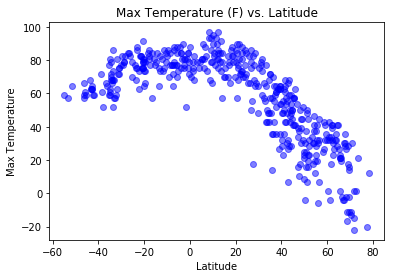

In [30]:
# * Temperature (F) vs. Latitude

plt.scatter(df['Latitude'], df['Temperature'], c='blue', alpha=0.5)

plt.title("Max Temperature (F) vs. Latitude")
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")

plt.show()

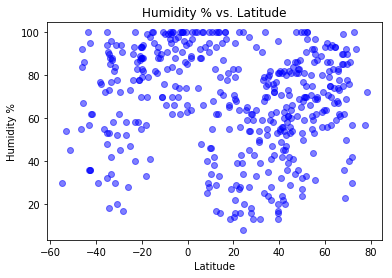

In [31]:
# * Humidity (%) vs. Latitude

plt.scatter(df['Latitude'], df['Humidity'], c='blue', alpha=0.5)

plt.title("Humidity % vs. Latitude")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")

plt.show()

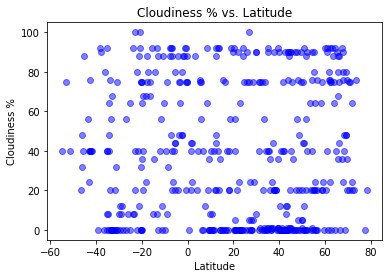

In [32]:
# Your objective is to build a series of scatter plots to showcase the following relationships:

# * Cloudiness (%) vs. Latitude
plt.scatter(df['Latitude'], df['Cloudiness'], c='blue', alpha=0.5)

plt.title("Cloudiness % vs. Latitude")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")

plt.show()


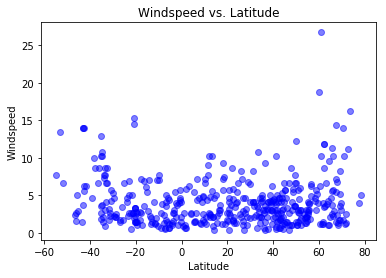

In [33]:
# * Wind Speed (mph) vs. Latitude
plt.scatter(df['Latitude'], df['Windspeed'], c='blue', alpha=0.5)

plt.title("Windspeed vs. Latitude")
plt.ylabel("Windspeed")
plt.xlabel("Latitude")

plt.show()

In [ ]:
# Written description of three observable trends based on the data.
# 1) Humidity is higher in cities that are closer to the equator 
# 2) Windspeed is lower in cities that are closer to the equator
# 3) Cloudiness doesn't seem to have as strong of a coorelation in realtion to location near the equator
# 4) Cities that are closer to the equator have higher temperatues thatn cities further from the equator